In [75]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import h
from neuron.units import ms, mV, um
h.load_file('stdrun.hoc') 

1.0

In [76]:
axon = h.Section(name='axon')
axon.L = 20000 * um
axon.diam = 10 * um
axon.nseg = 1001
axon.Ra = 35.4
axon.cm = 1
axon.insert(h.hh)
axon.insert(h.pas)
axon.insert(h.extracellular)
axon.insert(h.xtra)
for seg in axon:
    seg.pas.e = -65
    seg.xraxial[0] = 1e9
    seg.xraxial[1] = 1e9
    seg.xg[0] = 1e9
    seg.xg[1] = 1e9
    seg.xc[0] = 0
    seg.xc[1] = 0
    seg.e_extracellular = 0
    seg.xtra._ref_im = seg._ref_i_membrane
    seg.xtra._ref_ex = seg._ref_e_extracellular

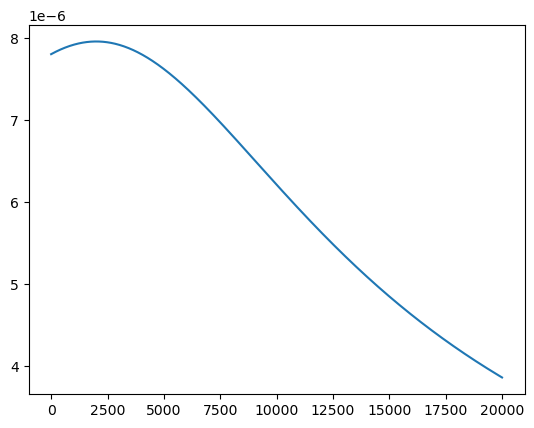

In [77]:
axn_x = np.linspace(0, 1, 1002) * axon.L
axn_y = np.zeros(1002) * um
axn_z = np.ones(1002) * 0.5 * axon.diam

src_x = np.ones(1002) * 0.1 * axon.L
src_y = np.zeros(1002) * um
src_z = np.ones(1002) * 1e4 * um

r = np.sqrt((axn_x-src_x)**2+(axn_y-src_y)**2+(axn_z-src_z)**2)
rho = 1
xr = rho/(4*np.pi*rho*r)

plt.plot(axn_x, xr)
plt.show()

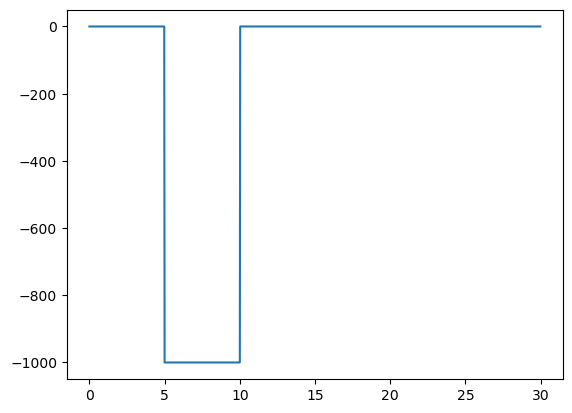

In [78]:
delay = 5 * ms
amp = -1000
dur = 5 * ms
t = np.arange(0 * ms, 30 * ms, 0.025 * ms)
si = np.where((t >= delay) & (t <= delay + dur), amp, 0)
plt.plot(t, si)
plt.show()

In [79]:
si = h.Vector(si)
t = h.Vector(t)
si.play(h._ref_is_xtra, t, True)
for idx, seg in enumerate(axon):
    seg.rx_xtra = xr[idx]

In [80]:
trec = h.Vector().record(h._ref_t)
vrec1 = h.Vector().record(axon(0.1)._ref_v)
vrec2 = h.Vector().record(axon(0.5)._ref_v)
vrec3 = h.Vector().record(axon(0.9)._ref_v)

In [81]:
h.finitialize(-65 * mV)
h.continuerun(30 * ms)

0.0

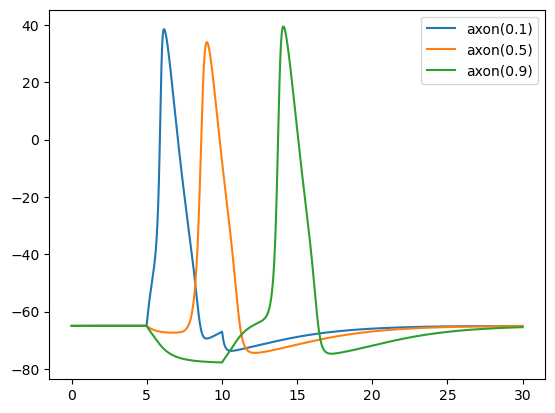

In [82]:
plt.plot(trec, vrec1, label='axon(0.1)')
plt.plot(trec, vrec2, label='axon(0.5)')
plt.plot(trec, vrec3, label='axon(0.9)')
plt.legend()